# 图像腐蚀与膨胀

In [33]:
import numpy as np
import cupy as cp
import cv2
import string
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import  animation

In [34]:
def load_kernel(src,kname):
    _ = cp.zeros((1,)) # 初始化cuda context
    kernel = cp.core.core.compile_with_cache(src).get_function(kname)
    return kernel
def load_kernel_file(fname,kname):
    sources = None
    with open(fname,encoding='utf-8') as f:
        sources = f.read()
    kernel = load_kernel(sources,kname)
    return kernel

In [44]:
erode = load_kernel_file('../../datas/cuda/erode.cu','erode')
dilate = load_kernel_file('../../datas/cuda/erode.cu','dilate')

In [45]:
src = cv2.imread('../../datas/char.jpg',0)

In [46]:
height,width = src.shape
dim_block = (32,32)
grid = ((dim_block[0] + width - 1) // dim_block[0],
        (dim_block[1] + height - 1) // dim_block[1])
src_cu = cp.array(src).astype(cp.float32)
dst_erode_cu = cp.zeros(src.shape,dtype=cp.float32)
dst_dilate_cu = cp.zeros(src.shape,dtype=cp.float32)

In [47]:
erode(grid=grid,block=dim_block,args=(src_cu,dst_erode_cu,3,5,width,height))
dilate(grid=grid,block=dim_block,args=(src_cu,dst_dilate_cu,3,5,width,height))

In [48]:
dst_erode = dst_erode_cu.get()
dst_dilate = dst_dilate_cu.get()
dst_erode = np.uint8(np.abs(dst_erode))
dst_dilate = np.uint8(np.abs(dst_dilate))

([], <a list of 0 Text yticklabel objects>)

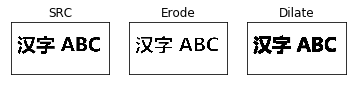

In [49]:
plt.subplot(131)
plt.imshow(src,'gray')
plt.title('SRC')
plt.xticks([])
plt.yticks([])
plt.subplot(132)
plt.imshow(dst_erode,'gray')
plt.title('Erode')
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(dst_dilate,'gray')
plt.title('Dilate')
plt.xticks([])
plt.yticks([])

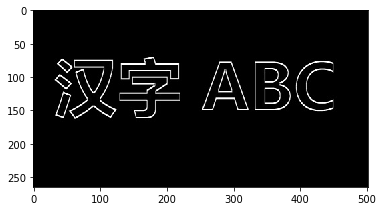

In [52]:
plt.imshow(np.abs(dst_erode - src),'gray')

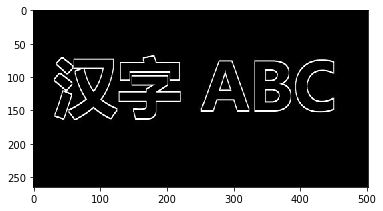

In [54]:
plt.imshow(np.abs(src - dst_dilate),'gray')